# Loan Application Status Prediction

#### Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

#### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

#### Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
#importing necessary library
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#reading csv and storing it in df
#using double slash because of unicode error
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y



#### dropping loan id as its for identificaton purpose

In [3]:
df.drop(['Loan_ID'],axis=1,inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#### check for duplicates

In [4]:
df.duplicated().sum()

0

no duplicates are present

#### checking datatype

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


combination of numerical and object data type

#### Checking for unique values in each columns

In [6]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

#### checking for nulls

In [7]:
df.isnull().sum().sum()

149

nulls are present

In [8]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- nulls present in 
    - Gender 
    - Married
    - Dependents
    - Self_Employed
    - LoanAmount
    - Loan_Amount_Term
    - Credit_History       

#### Imputation

- Gender
    - as it takes two values male or female 
    -  replacing null value by mode value

In [9]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
# all null values replaced by value male
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

In [11]:
#check
df['Gender'].isna().sum()

0

- Married
    - as it takes two values yes or no 
    - replacing null value by mode value

In [12]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [13]:
# all null values replaced by value yes
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])

In [14]:
#check
df['Married'].isna().sum()

0

- Dependents
    - takes three values 1, 2 or 3+
    - replacing null value by mode value

In [15]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [16]:
# all null values replaced by value 0
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])

In [17]:
#check
df['Married'].isna().sum()

0

- Self_Employed
    - takes two values yes or no
    - replacing null value by mode value

In [18]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [19]:
# all null values replaced by value yes
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

In [20]:
#check
df['Self_Employed'].isna().sum()

0

- LoanAmount           
    - is continous data
    - using mean to fill the null datas

In [21]:
#finding the mean 
df['LoanAmount'].mean()

146.41216216216216

In [22]:
# all null values replaced by value yes
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].mean())

#check
df['LoanAmount'].isna().sum()

0

- Loan_Amount_Term      
    - is continous data
    - using mean to fill the null datas

In [23]:
outlet_size_modes=df.groupby(["LoanAmount"]).agg({"Loan_Amount_Term":lambda x: x.value_counts().index[0]})
outlet_size_modes

,Loan_Amount_Term
LoanAmount,
9.0,360.0
17.0,120.0
25.0,120.0
26.0,360.0
30.0,360.0
...,...
500.0,360.0
570.0,360.0
600.0,180.0


In [24]:
for index in outlet_size_modes.index:
    pos=df.loc[df["LoanAmount"]==index,["Loan_Amount_Term"]].isnull()
    for index_2 in pos.index:
        if pos.loc[index_2][0]==True:
            df.loc[index_2,["Loan_Amount_Term"]]=outlet_size_modes.loc[index][0]

In [25]:
#check
df['Loan_Amount_Term'].isna().sum()

0

- Credit_History
    - takes two value 0 or 1 
    - flling nulls with mode value

In [26]:
#finding the mode value
df['Credit_History'].mode()

0    1.0
dtype: float64

In [27]:
# all null values replaced by value yes
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])

#check
df['Credit_History'].isna().sum()

0

#### seperating numerical and categorical data type

In [28]:
numericalCol=df.select_dtypes(include=np.number).columns
print("The numerical columns are:",numericalCol)
print('\n')
objectColumns=df.select_dtypes(include=np.object).columns
print("The categorical columns are:",objectColumns)

The numerical columns are: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


The categorical columns are: Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')


#### seperating numerical columns into two categories discrete and continuous

In [29]:
discretecols=[]
continuecols=[]

for column in numericalCol:
     if df[column].nunique()>50:
        continuecols.append(column)
     
     else:
        discretecols.append(column)
        
print("The discrete columns are:",discretecols)
print('\n')
print("The continuous columns are:",continuecols) 

The discrete columns are: ['Loan_Amount_Term', 'Credit_History']


The continuous columns are: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']



#### checking how the data is defined statistically for numerical continuous datas and visualising

In [30]:
df[continuecols].describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0


- ApplicantIncome
    - mean to std ratio is 0.88 
    - the difference between quantile is not uniform

 
 
- CoapplicantIncome
    - mean to std is 0.55
    - the difference between quantile is not uniform

    
    
-  LoanAmount
    - mean to std is 1.7
    - the difference between quantile is not uniform 
    - concentration of data at the middle
    

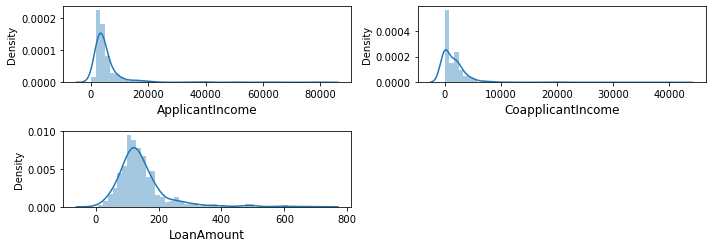

In [31]:
# plotting distribution graph 
j=0
plt.figure(figsize=(10,10))
for column in df[continuecols]:
    plt.subplot(6,2,j+1)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()

- ApplicantIncome
    - Most of the applicant income is between 0 to 15000
    - Very few applicants have salary between 20000 to 80000
    - Positively skewed
    
    
- CoapplicantIncome
    - Most of the coapplicant income is inbetween 0 to 8000
    - Very few coapplicants have income between 8000 to 40000
    - Positively skewed
    
    
- LoanAmount
    - Most of the loan amount is between 50 to 200
    - Very few loan amount is between 200 to 80
    - Positively skewed

#### checking how the data is defined statistically for numerical discrete datas and visualising

In [32]:
df[discretecols].describe().T

,count,mean,std,min,25%,50%,75%,max
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.0,360.0,360.0,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.0,1.0,1.0,1.0


Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


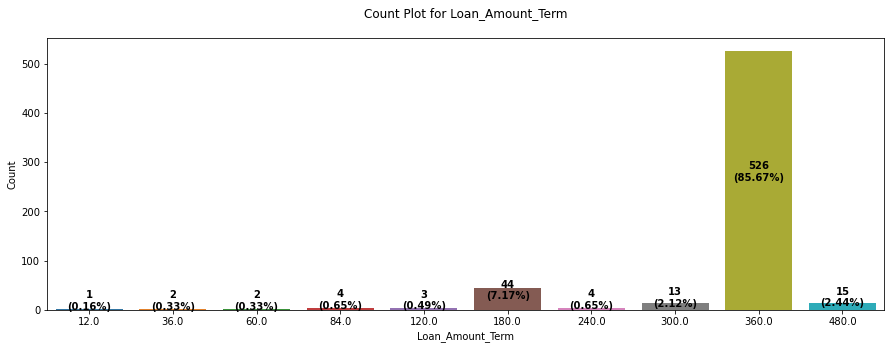

Credit_History
1.0    525
0.0     89
Name: Credit_History, dtype: int64


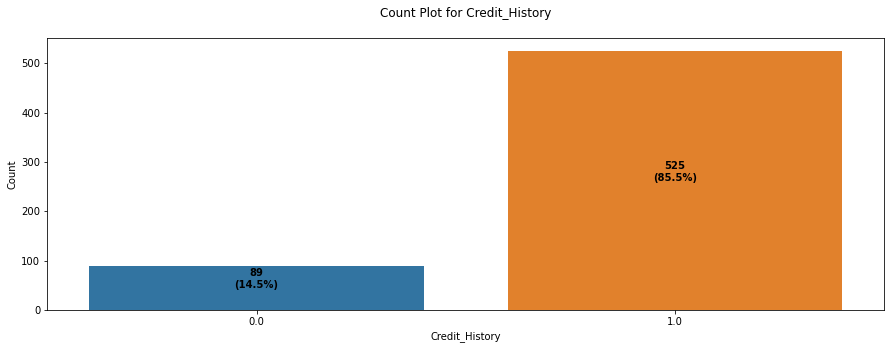

In [33]:
 #listing all Categorical data and plotting 
for x in discretecols:
    print(x)
    print(df[x].value_counts())
    plt.figure(figsize=(15,5))
    col_name = x
    values = df[x].value_counts()
    index = 0
    ax = sns.countplot(df[x])

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {x}\n")
    plt.xlabel(x)
    plt.ylabel(f"Count")
    plt.show()

- Loan_Amount_Term
    - most of the people opt for loan term of 360
    
    
- Credit_History
    - most of the people have credit history 1

#### checking how the data is defined statistically for categorical datas`and visualising

In [34]:
df[objectColumns].describe(include=['O'])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,502,401,360,480,532,233,422


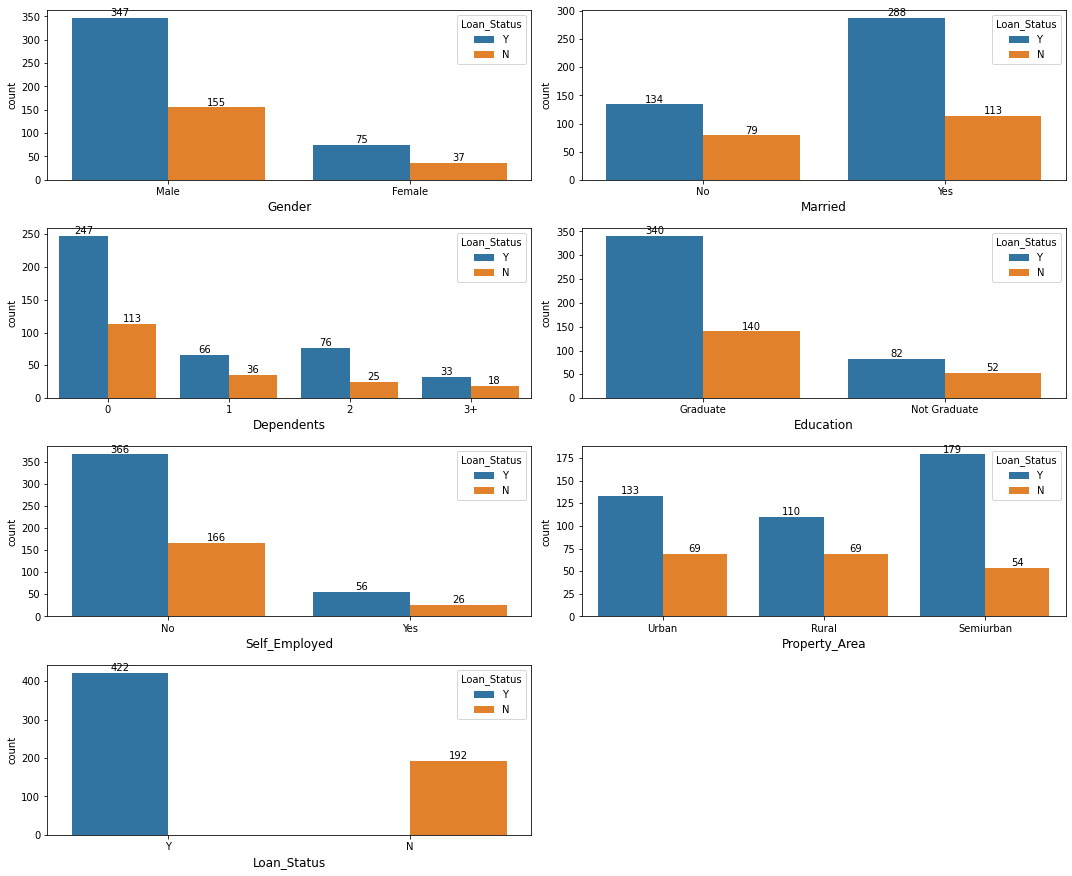

In [35]:
# plotting countplot graph 
j=0
plt.figure(figsize=(15,30))
for column in df[objectColumns]:
    plt.subplot(10,2,j+1)
    ax =sns.countplot(df[column], hue=df['Loan_Status'])
    ax.bar_label(ax.containers[0]);
    ax.bar_label(ax.containers[1]);
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()

- Gender
    - count wise males has more chance in getting loan approved
    - when we compared loan acceptance for a male to get loan its 69% (obtained as male(yes)/total of male ) and for female its 66% (obtained as female(yes)/total of female)
    

- Married    
    - Married people get more loan approved
    - chance for a married person to get loan approved is 68.4% and for not marries is 62.9%    
    
    
- Dependents
    - Dependents 0 has the most no. of loan approved
    - Dependents 2 has the most chance of getting approval followed by Dependesnt 0

    
-   Education
    - Graduates has most of loan approved
    - Graducates has more chance of getting loan approved

    
- Self_Employed
    - poeple who are not self employeed has most loan approved
    - chance of getting loan approved is same for both cases
    

- Property_Area
    - people in semi_urban area has most loan approved
    - chance of getting loan approved is more in semi urban areas
    
 
- Loan_Status
    - the dataset is not balanced n/y ratio is 0.45
    - balancing technique should be adopted

#### Bivariate analysis

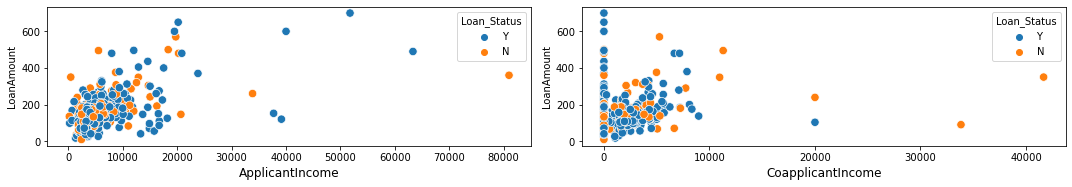

In [36]:
j=0

plt.figure(figsize=(15,15))
for column in df[continuecols[0:2]]:
    plt.subplot(6,2,j+1)
    sns.scatterplot(data=df,x=column,s=70, y="LoanAmount", hue="Loan_Status")
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()

- most of the applicants have income of 5000 and take a loan amount of 200
- most of the coapplicants income is zero irrespectve of the loan amount, there are cases where coapplicant make income from 50 to 5000

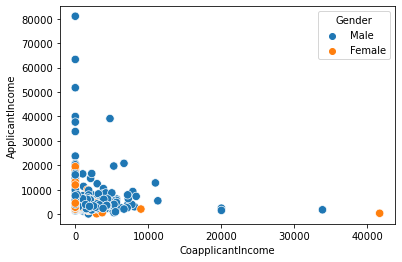

In [37]:
sns.scatterplot(data=df,y='ApplicantIncome',s=70, x="CoapplicantIncome", hue="Gender")
plt.show()

- males income is more than female 

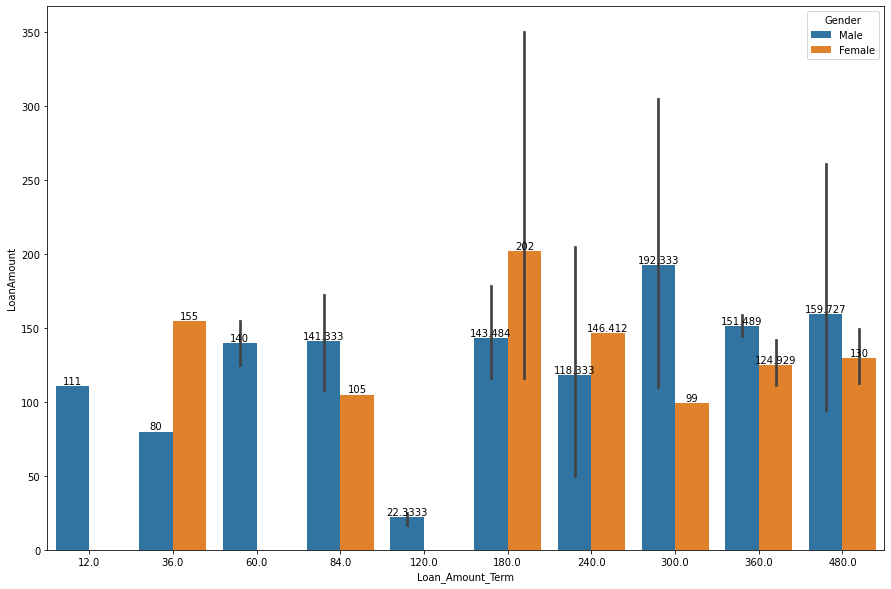

In [38]:
plt.figure(figsize=(15,10))
ax=sns.barplot(data=df,x='Loan_Amount_Term', y="LoanAmount", hue="Gender")
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
plt.show()

- for loan term of 36 and 180 female are allowed to borrow more than male 
- female can borrow a larger amount than male, but for term of 36, 180 and 240 

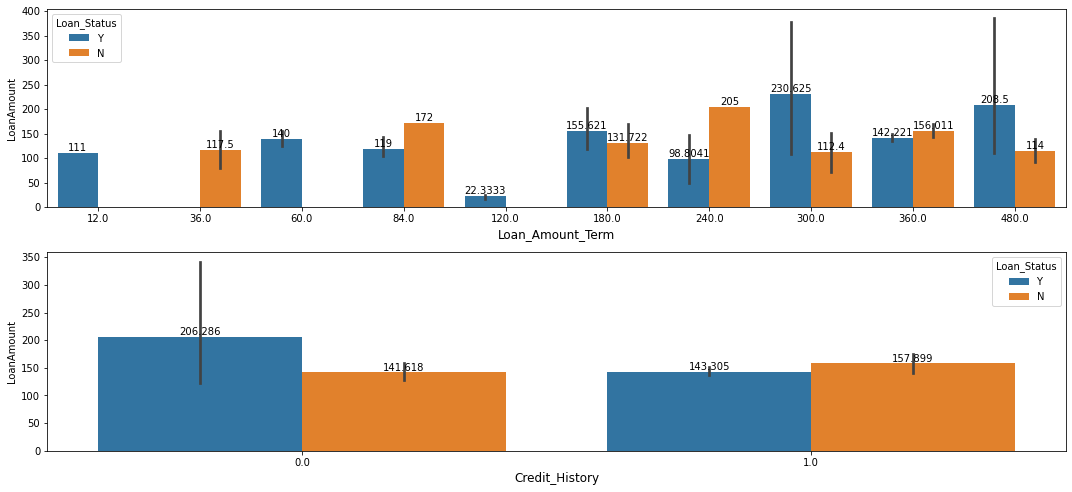

In [40]:
j=0
plt.figure(figsize=(15,20))
for column in df[discretecols]:
    plt.subplot(6,1,j+1)
    ax=sns.barplot(data=df,x=column, y="LoanAmount", hue="Loan_Status")
    ax.bar_label(ax.containers[0]);
    ax.bar_label(ax.containers[1]);
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()

- loan amount term
    - for terms of 12, 60, 120 has loan status approved
    - for term of 36 has loan status dis-approved
    - highest avg loan amount is 230.625 for a term of 300
    - highest avg loan amount rejected is 205 for a term of 240
    
- Credit_History
    - loan amount is higher for those belonging in to credit history 0 
    - loan amount approved for 1 is less, so the avg amount for customers to take loan is 143.305, any greater amount would result in rejection of loan application 

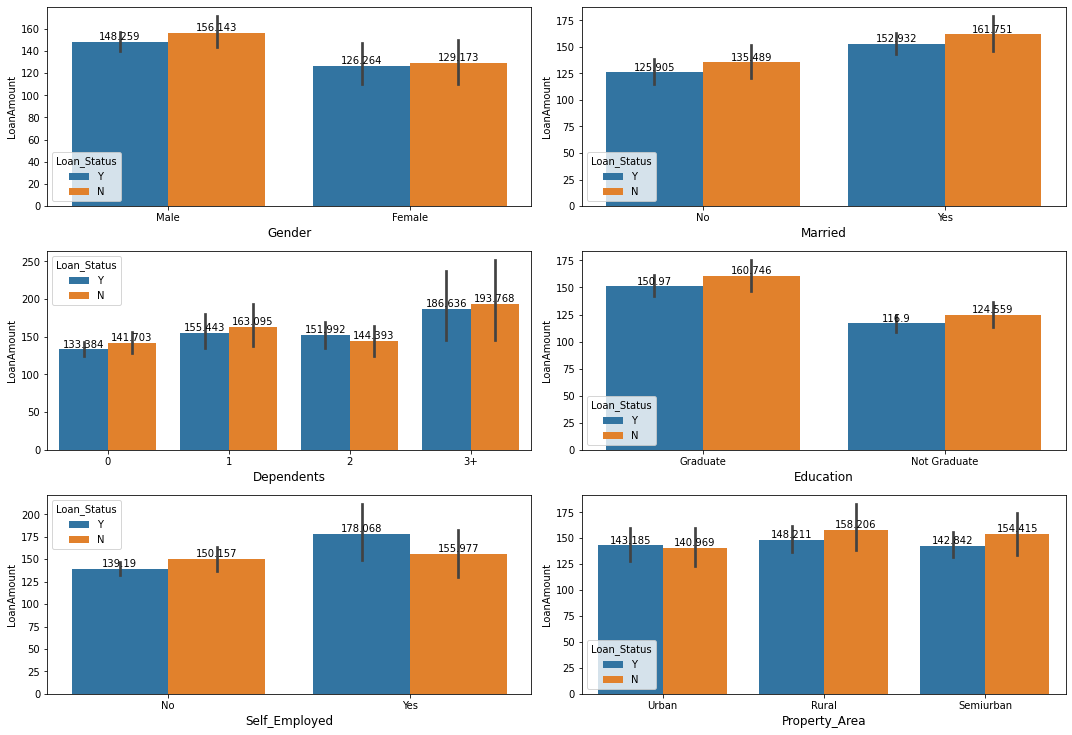

In [41]:
j=0
plt.figure(figsize=(15,20))
for column in df[objectColumns[0:6]]:
    plt.subplot(6,2,j+1)
    ax=sns.barplot(data=df,x=column, y="LoanAmount", hue="Loan_Status")
    ax.bar_label(ax.containers[0]);
    ax.bar_label(ax.containers[1]);
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()

- Gender 
    - males are allowed to borrow loan amount than female, becasue the income of males is more than female
    
    
- Married
    - Married people are allowed to borrow more loan amount compared to singles
    
    
- Dependents 
    - as the no of dependents increases the loan amount which can be borrowed increases
    
    
- Education 
    - Graduates are allowed to borrow more amount than non-graduates
    
    
- Self Employed
    - self employed people are allowed to borrow more loan amount
    
    
    
- Propert_Area
    - People who live in Rural areas can borrrow more ammount than those who reside in urban followed by semi urban areas

#### check skewness

In [49]:
df.skew()[continuecols].sort_values()

LoanAmount           2.726601
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
dtype: float64

skewness is not within limits

#### using power transform to transform the datas


In [50]:
#using power transform to transform and normalize the dataset and storing it in A and copying it to df
from sklearn.preprocessing import power_transform
B=df[continuecols].copy()
A=power_transform(B)
A=pd.DataFrame(A,columns=B.columns)
df[B.columns]=A.copy()
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,0.544331,-1.102837,0.235387,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,0.170974,0.750578,-0.037659,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,-0.499955,-1.102837,-1.346305,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,-0.743873,0.891686,-0.167886,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,0.582817,-1.102837,0.158610,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,-0.554885,-1.102837,-1.205100,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,-0.000290,-1.102837,-2.293317,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,1.023487,0.208603,1.372409,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,0.931750,-1.102837,0.738924,360.0,1.0,Urban,Y


In [51]:
df.skew()[continuecols].sort_values()

CoapplicantIncome   -0.145646
ApplicantIncome     -0.092946
LoanAmount           0.024376
dtype: float64

skewness is within limits 0.65 to -0.65

#### Encoding

In [52]:
l_s={'Y':1,'N':0}
df['Loan_Status'] = df['Loan_Status'].map(l_s)
df['Loan_Status'].unique()

array([1, 0], dtype=int64)

In [53]:
objcol=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

In [54]:
df=pd.get_dummies(columns=objcol, drop_first = True,data=df)
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.544331,-1.102837,0.235387,360.0,1.0,1,1,0,0,0,0,0,0,0,1
1,0.170974,0.750578,-0.037659,360.0,1.0,0,1,1,1,0,0,0,0,0,0
2,-0.499955,-1.102837,-1.346305,360.0,1.0,1,1,1,0,0,0,0,1,0,1
3,-0.743873,0.891686,-0.167886,360.0,1.0,1,1,1,0,0,0,1,0,0,1
4,0.582817,-1.102837,0.158610,360.0,1.0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.554885,-1.102837,-1.205100,360.0,1.0,1,0,0,0,0,0,0,0,0,0
610,-0.000290,-1.102837,-2.293317,180.0,1.0,1,1,1,0,0,1,0,0,0,0
611,1.023487,0.208603,1.372409,360.0,1.0,1,1,1,1,0,0,0,0,0,1
612,0.931750,-1.102837,0.738924,360.0,1.0,1,1,1,0,1,0,0,0,0,1


#### checking correlation

In [55]:
numer=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status']

In [56]:
df[numer].corr()['Loan_Status'].sort_values()

LoanAmount          -0.042494
Loan_Amount_Term    -0.022549
ApplicantIncome      0.013568
CoapplicantIncome    0.056869
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

Credit_History has the highest correlation rest all have very small amount of correlation with the target variable

#### plotting heatmap to see the correlation with other feature

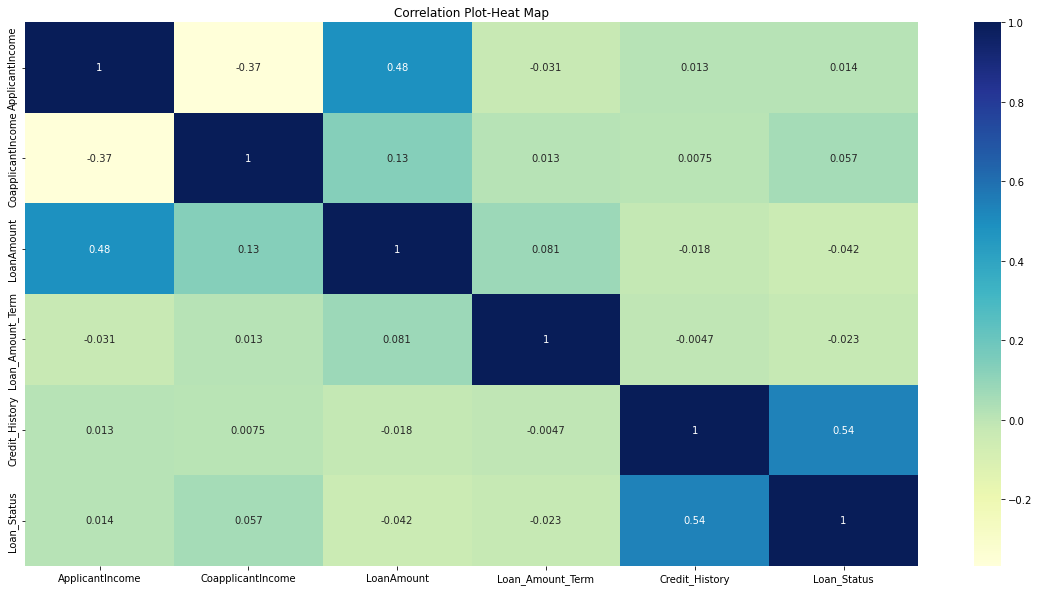

In [57]:
plt.figure(figsize=(20,10))
sns.heatmap(df[numer].corr(),annot=True,cmap="YlGnBu")
plt.title("Correlation Plot-Heat Map")
plt.show()

- feature to feature highest correlation value is 0.48 with application income and loan amount
- coapplication income and application income 0.37
- rest feature to feature correlation is very small 

#### using vif to check for multicolinearity

In [58]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
k=df[numer].copy()
t=k.drop(['Loan_Status'],axis=1).copy()
d=sc.fit_transform(t)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(d, i)for i in range(len(t.columns))]
vif['features']=t.columns
vif.sort_values(by='vif',ascending=False)

,vif,features
0,1.755364,ApplicantIncome
2,1.555185,LoanAmount
1,1.358754,CoapplicantIncome
3,1.015003,Loan_Amount_Term
4,1.001547,Credit_History


vif is within the limits less than 10

#### Outliers check

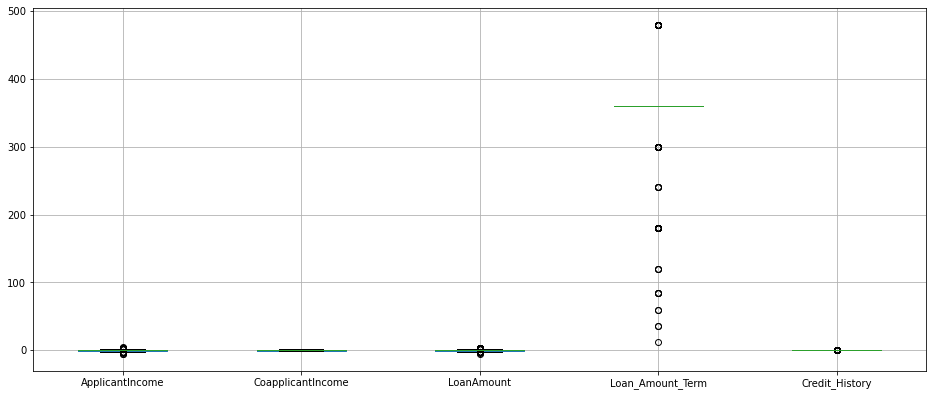

In [59]:
# visualizing
df[numericalCol].iloc[:,:].boxplot(figsize = (16,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

outliers present 

#### using z score for treating

In [60]:
from scipy.stats import zscore
z=np.abs(zscore(df[numericalCol]))
df_x=df[(z<3).all(axis=1)]
data_loss=((df.shape[0]-df_x.shape[0])/df.shape[0])*100
print("data loss ", data_loss, " %")

data loss  4.5602605863192185  %


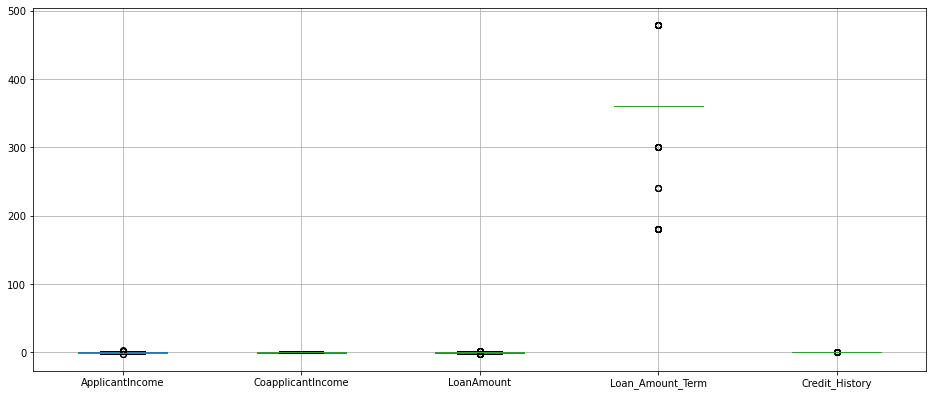

In [61]:
df_x[numericalCol].iloc[:,:].boxplot(figsize = (16,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

outliers have been reduced to some extend 

#### Splitting dataset

In [62]:
X_s=df_x.drop(columns=["Loan_Status"])
Y_s=df_x[["Loan_Status"]]

#### Using SMOTE to balance target

In [63]:
import six
import joblib
import sys
sys.modules['sklearn.externals.six']=six
sys.modules['sklearn.externals.joblib']=joblib
from imblearn.over_sampling import SMOTE

Loan_Status
1              402
0              184
dtype: int64


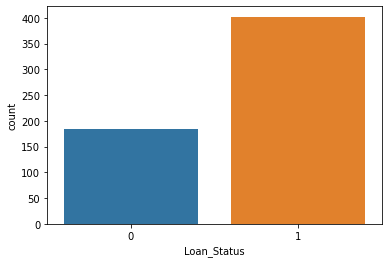

In [65]:
sns.countplot(Y_s['Loan_Status'])
print(Y_s.value_counts())
plt.show()

ratio of n/y is 0.45

In [66]:
# by using smote we are adding data to (Yes) 1 such that the ratio between 1 to 0 becomes 0.75
ove_sm=SMOTE(0.75)
X,Y=ove_sm.fit_resample(X_s,Y_s)
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.544331,-1.102837,0.235387,360.0,1.000000,1,0,0,0,0,0,0,0,1
1,0.170974,0.750578,-0.037659,360.0,1.000000,1,1,1,0,0,0,0,0,0
2,-0.499955,-1.102837,-1.346305,360.0,1.000000,1,1,0,0,0,0,1,0,1
3,-0.743873,0.891686,-0.167886,360.0,1.000000,1,1,0,0,0,1,0,0,1
4,0.582817,-1.102837,0.158610,360.0,1.000000,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,-0.801791,0.975882,-0.092915,360.0,0.000000,1,1,0,0,0,1,0,0,1
699,0.603661,-1.102837,0.932763,360.0,0.196398,1,1,0,0,0,1,0,0,0
700,-0.197826,0.857975,-0.149888,360.0,0.000000,1,1,0,0,0,0,0,0,0
701,1.465726,-1.102837,-0.823989,360.0,0.953297,1,0,0,0,0,0,1,0,1


Loan_Status
1              402
0              301
dtype: int64


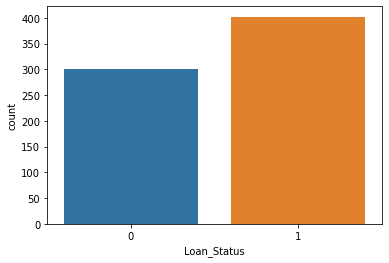

In [67]:
sns.countplot(Y['Loan_Status'])
print(Y.value_counts())
plt.show()

ratio of n/y is 0.75

#### Running Algorithm

In [68]:
#importing necessary librairies 
#A=[] // stores test accuracy
#B=[] // stores cv_mean 
#C=[] // stores mean_squared_error
#D=[] // min diff between test accuracy and cv_score
#mae=[] // stores mean_absolute_error


from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
A=[]
B=[]
C=[]
D=[]
E=[]
mae=[]

In [69]:
#loop used to find the best random state
def max_aucroc_score(regr,X,Y):
    max_aucroc_score=0
    for r_state in range(0,100):
        x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = r_state, test_size=0.20,stratify=Y)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        aucroc_scr=(accuracy_score(y_test,y_pred))*100
        print("accuracy score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max accuracy score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [70]:
# used to get test accuracy, train accuracy, mse, mae,F1score,confusion matrix,classification report and auc score
def te_t(regr,x_train,x_test,y_train,y_test):
    regr.fit(x_train,y_train)
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    print(f"test accuracy is {round(accuracy_score(y_test,y_te)*100,1)}")
    A.append(round(accuracy_score(y_test,y_te)*100,1))
   
    print(f"train accuracy is {round(accuracy_score(y_train,y_tr)*100,1)}")
    C.append(mean_squared_error(y_test,y_te))
    mae.append(mean_absolute_error(y_test,y_te))
    
    
    cm = confusion_matrix(y_test, y_te)
    class_label = ["Yes", "No"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    print('\n')
    
    print("f1 score is : ",f1_score(y_test,y_te))
    E.append(f1_score(y_test,y_te))
    print('\n')
    
    print("classification report \n",classification_report(y_test,y_te))
   

In [71]:
# used to find the best cv_score
def score(regr,x_train,x_test,y_train,y_test):
    max_cv_mean=0
    min_dif=100
    r=0
    k=0
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    t_ac=round(accuracy_score(y_train,y_tr)*100,1)
    te_ac=round(accuracy_score(y_test,y_te)*100,1)
    for j in range(2,20):
        cv_score=cross_val_score(regr,X,Y,cv=j)
        cv_mean=cv_score.mean()*100
        d=np.abs(cv_mean-te_ac)
        print(f"At cv is {j} cv score is {round(cv_mean,2)}  \n test accuracy is {te_ac} \n")
        if cv_mean>max_cv_mean:
            max_cv_mean=cv_mean
            k=j
        if d<min_dif:
            min_dif=d
            r=j
    B.append(max_cv_mean) 
    print("min diff between test accuracy and cv score ",min_dif," at ", r," max cv ",max_cv_mean," at ",k)
    D.append(min_dif)

In [72]:
from sklearn.tree import DecisionTreeClassifier
reg=DecisionTreeClassifier()
R=max_aucroc_score(reg,X,Y)

accuracy score corresponding to  0  is  79.43262411347519
accuracy score corresponding to  1  is  78.72340425531915
accuracy score corresponding to  2  is  78.01418439716312
accuracy score corresponding to  3  is  75.177304964539
accuracy score corresponding to  4  is  73.04964539007092
accuracy score corresponding to  5  is  78.01418439716312
accuracy score corresponding to  6  is  73.75886524822694
accuracy score corresponding to  7  is  76.59574468085107
accuracy score corresponding to  8  is  73.75886524822694
accuracy score corresponding to  9  is  72.3404255319149
accuracy score corresponding to  10  is  76.59574468085107
accuracy score corresponding to  11  is  74.46808510638297
accuracy score corresponding to  12  is  80.85106382978722
accuracy score corresponding to  13  is  78.72340425531915
accuracy score corresponding to  14  is  69.50354609929079
accuracy score corresponding to  15  is  76.59574468085107
accuracy score corresponding to  16  is  76.59574468085107
accuracy s

test accuracy is 68.8
train accuracy is 100.0


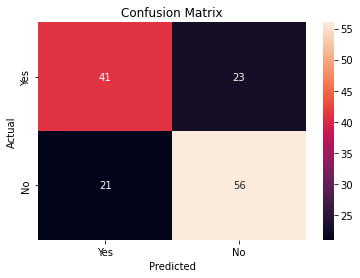



f1 score is :  0.717948717948718


classification report 
               precision    recall  f1-score   support

           0       0.66      0.64      0.65        64
           1       0.71      0.73      0.72        77

    accuracy                           0.69       141
   macro avg       0.69      0.68      0.68       141
weighted avg       0.69      0.69      0.69       141



At cv is 2 cv score is 70.41  
 test accuracy is 68.8 

At cv is 3 cv score is 73.4  
 test accuracy is 68.8 

At cv is 4 cv score is 71.98  
 test accuracy is 68.8 

At cv is 5 cv score is 72.7  
 test accuracy is 68.8 

At cv is 6 cv score is 73.13  
 test accuracy is 68.8 

At cv is 7 cv score is 72.84  
 test accuracy is 68.8 

At cv is 8 cv score is 74.68  
 test accuracy is 68.8 

At cv is 9 cv score is 73.98  
 test accuracy is 68.8 

At cv is 10 cv score is 74.56  
 test accuracy is 68.8 

At cv is 11 cv score is 73.41  
 test accuracy is 68.8 

At cv is 12 cv score is 75.14  
 test accuracy is 

In [73]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(reg,x1_train,x1_test,y1_train,y1_test)
print('\n')
score(reg,x1_train,x1_test,y1_train,y1_test)

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf_c=RandomForestClassifier()
R=max_aucroc_score(rf_c,X,Y)

accuracy score corresponding to  0  is  84.39716312056737
accuracy score corresponding to  1  is  85.1063829787234
accuracy score corresponding to  2  is  79.43262411347519
accuracy score corresponding to  3  is  80.85106382978722
accuracy score corresponding to  4  is  80.1418439716312
accuracy score corresponding to  5  is  82.97872340425532
accuracy score corresponding to  6  is  81.56028368794325
accuracy score corresponding to  7  is  75.88652482269504
accuracy score corresponding to  8  is  82.26950354609929
accuracy score corresponding to  9  is  81.56028368794325
accuracy score corresponding to  10  is  84.39716312056737
accuracy score corresponding to  11  is  80.85106382978722
accuracy score corresponding to  12  is  80.85106382978722
accuracy score corresponding to  13  is  82.97872340425532
accuracy score corresponding to  14  is  75.88652482269504
accuracy score corresponding to  15  is  83.68794326241135
accuracy score corresponding to  16  is  80.85106382978722
accuracy 

test accuracy is 79.4
train accuracy is 100.0


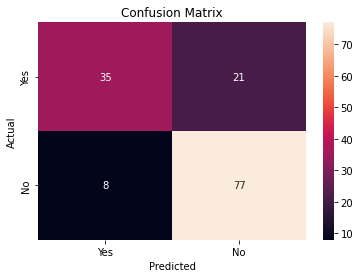



f1 score is :  0.8415300546448088


classification report 
               precision    recall  f1-score   support

           0       0.81      0.62      0.71        56
           1       0.79      0.91      0.84        85

    accuracy                           0.79       141
   macro avg       0.80      0.77      0.77       141
weighted avg       0.80      0.79      0.79       141



At cv is 2 cv score is 76.39  
 test accuracy is 79.4 

At cv is 3 cv score is 77.24  
 test accuracy is 79.4 

At cv is 4 cv score is 80.09  
 test accuracy is 79.4 

At cv is 5 cv score is 80.53  
 test accuracy is 79.4 

At cv is 6 cv score is 80.8  
 test accuracy is 79.4 

At cv is 7 cv score is 79.97  
 test accuracy is 79.4 

At cv is 8 cv score is 80.95  
 test accuracy is 79.4 

At cv is 9 cv score is 80.23  
 test accuracy is 79.4 

At cv is 10 cv score is 81.53  
 test accuracy is 79.4 

At cv is 11 cv score is 81.23  
 test accuracy is 79.4 

At cv is 12 cv score is 80.84  
 test accuracy i

In [75]:
x2_train,x2_test,y2_train,y2_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(rf_c,x2_train,x2_test,y2_train,y2_test)
print('\n')
score(rf_c,x2_train,x2_test,y2_train,y2_test)

In [76]:
from sklearn.neighbors import KNeighborsClassifier
kc=KNeighborsClassifier()
R=max_aucroc_score(kc,X,Y)

accuracy score corresponding to  0  is  70.92198581560284
accuracy score corresponding to  1  is  70.92198581560284
accuracy score corresponding to  2  is  74.46808510638297
accuracy score corresponding to  3  is  72.3404255319149
accuracy score corresponding to  4  is  65.95744680851064
accuracy score corresponding to  5  is  73.75886524822694
accuracy score corresponding to  6  is  76.59574468085107
accuracy score corresponding to  7  is  72.3404255319149
accuracy score corresponding to  8  is  74.46808510638297
accuracy score corresponding to  9  is  76.59574468085107
accuracy score corresponding to  10  is  74.46808510638297
accuracy score corresponding to  11  is  69.50354609929079
accuracy score corresponding to  12  is  71.63120567375887
accuracy score corresponding to  13  is  75.177304964539
accuracy score corresponding to  14  is  75.88652482269504
accuracy score corresponding to  15  is  73.04964539007092
accuracy score corresponding to  16  is  74.46808510638297
accuracy sc

test accuracy is 76.6
train accuracy is 82.7


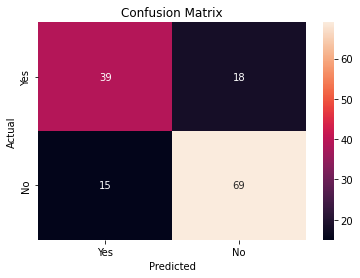



f1 score is :  0.8070175438596492


classification report 
               precision    recall  f1-score   support

           0       0.72      0.68      0.70        57
           1       0.79      0.82      0.81        84

    accuracy                           0.77       141
   macro avg       0.76      0.75      0.75       141
weighted avg       0.76      0.77      0.76       141



At cv is 2 cv score is 71.84  
 test accuracy is 76.6 

At cv is 3 cv score is 69.14  
 test accuracy is 76.6 

At cv is 4 cv score is 70.13  
 test accuracy is 76.6 

At cv is 5 cv score is 70.42  
 test accuracy is 76.6 

At cv is 6 cv score is 70.55  
 test accuracy is 76.6 

At cv is 7 cv score is 71.13  
 test accuracy is 76.6 

At cv is 8 cv score is 71.84  
 test accuracy is 76.6 

At cv is 9 cv score is 70.83  
 test accuracy is 76.6 

At cv is 10 cv score is 72.12  
 test accuracy is 76.6 

At cv is 11 cv score is 72.26  
 test accuracy is 76.6 

At cv is 12 cv score is 71.85  
 test accuracy 

In [77]:
x3_train,x3_test,y3_train,y3_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(kc,x3_train,x3_test,y3_train,y3_test)
print('\n')
score(kc,x3_train,x3_test,y3_train,y3_test)

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
grad_c=GradientBoostingClassifier()
R=max_aucroc_score(grad_c,X,Y)


accuracy score corresponding to  0  is  79.43262411347519
accuracy score corresponding to  1  is  75.177304964539
accuracy score corresponding to  2  is  77.30496453900709
accuracy score corresponding to  3  is  81.56028368794325
accuracy score corresponding to  4  is  75.177304964539
accuracy score corresponding to  5  is  78.01418439716312
accuracy score corresponding to  6  is  73.04964539007092
accuracy score corresponding to  7  is  74.46808510638297
accuracy score corresponding to  8  is  76.59574468085107
accuracy score corresponding to  9  is  81.56028368794325
accuracy score corresponding to  10  is  80.1418439716312
accuracy score corresponding to  11  is  82.26950354609929
accuracy score corresponding to  12  is  77.30496453900709
accuracy score corresponding to  13  is  78.72340425531915
accuracy score corresponding to  14  is  74.46808510638297
accuracy score corresponding to  15  is  79.43262411347519
accuracy score corresponding to  16  is  73.75886524822694
accuracy sco

test accuracy is 79.4
train accuracy is 88.8


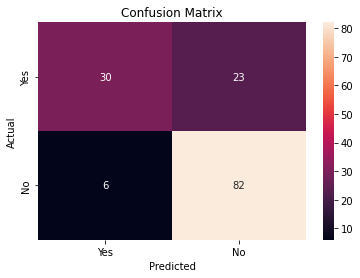



f1 score is :  0.849740932642487


classification report 
               precision    recall  f1-score   support

           0       0.83      0.57      0.67        53
           1       0.78      0.93      0.85        88

    accuracy                           0.79       141
   macro avg       0.81      0.75      0.76       141
weighted avg       0.80      0.79      0.78       141



At cv is 2 cv score is 72.97  
 test accuracy is 79.4 

At cv is 3 cv score is 75.68  
 test accuracy is 79.4 

At cv is 4 cv score is 76.53  
 test accuracy is 79.4 

At cv is 5 cv score is 76.97  
 test accuracy is 79.4 

At cv is 6 cv score is 77.1  
 test accuracy is 79.4 

At cv is 7 cv score is 76.68  
 test accuracy is 79.4 

At cv is 8 cv score is 76.25  
 test accuracy is 79.4 

At cv is 9 cv score is 76.53  
 test accuracy is 79.4 

At cv is 10 cv score is 76.84  
 test accuracy is 79.4 

At cv is 11 cv score is 76.54  
 test accuracy is 79.4 

At cv is 12 cv score is 76.85  
 test accuracy is

In [79]:
x4_train,x4_test,y4_train,y4_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(grad_c,x4_train,x4_test,y4_train,y4_test)
print('\n')
score(grad_c,x4_train,x4_test,y4_train,y4_test)

In [80]:
from sklearn.ensemble import AdaBoostClassifier
adboost_c=AdaBoostClassifier()
R=max_aucroc_score(adboost_c,X,Y)

accuracy score corresponding to  0  is  77.30496453900709
accuracy score corresponding to  1  is  78.72340425531915
accuracy score corresponding to  2  is  75.88652482269504
accuracy score corresponding to  3  is  80.85106382978722
accuracy score corresponding to  4  is  71.63120567375887
accuracy score corresponding to  5  is  75.88652482269504
accuracy score corresponding to  6  is  73.04964539007092
accuracy score corresponding to  7  is  75.177304964539
accuracy score corresponding to  8  is  80.1418439716312
accuracy score corresponding to  9  is  80.85106382978722
accuracy score corresponding to  10  is  82.97872340425532
accuracy score corresponding to  11  is  82.26950354609929
accuracy score corresponding to  12  is  75.177304964539
accuracy score corresponding to  13  is  78.01418439716312
accuracy score corresponding to  14  is  75.177304964539
accuracy score corresponding to  15  is  78.01418439716312
accuracy score corresponding to  16  is  78.72340425531915
accuracy score

test accuracy is 78.7
train accuracy is 84.2


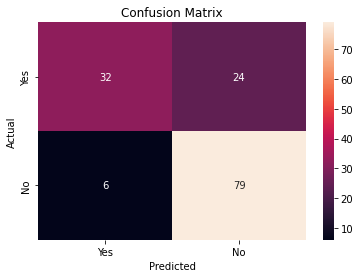



f1 score is :  0.8404255319148938


classification report 
               precision    recall  f1-score   support

           0       0.84      0.57      0.68        56
           1       0.77      0.93      0.84        85

    accuracy                           0.79       141
   macro avg       0.80      0.75      0.76       141
weighted avg       0.80      0.79      0.78       141



At cv is 2 cv score is 70.84  
 test accuracy is 78.7 

At cv is 3 cv score is 73.69  
 test accuracy is 78.7 

At cv is 4 cv score is 73.68  
 test accuracy is 78.7 

At cv is 5 cv score is 75.12  
 test accuracy is 78.7 

At cv is 6 cv score is 75.25  
 test accuracy is 78.7 

At cv is 7 cv score is 77.12  
 test accuracy is 78.7 

At cv is 8 cv score is 75.25  
 test accuracy is 78.7 

At cv is 9 cv score is 74.68  
 test accuracy is 78.7 

At cv is 10 cv score is 75.7  
 test accuracy is 78.7 

At cv is 11 cv score is 74.82  
 test accuracy is 78.7 

At cv is 12 cv score is 76.12  
 test accuracy i

In [81]:
x5_train,x5_test,y5_train,y5_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(adboost_c,x5_train,x5_test,y5_train,y5_test)
print('\n')
score(adboost_c,x5_train,x5_test,y5_train,y5_test)

In [82]:
from sklearn.metrics import roc_curve,auc
area=[]

In [83]:
y_te=reg.predict(x1_test)
fpr1,tpr1,threshold1=roc_curve(y_te,y1_test)
roc_auc1= auc(fpr1, tpr1)
area.append(roc_auc1)
print("Area under the Decision Tree ROC curve : %f" % roc_auc1)

Area under the Decision Tree ROC curve : 0.685076


In [84]:
y_te=rf_c.predict(x2_test)
fpr2,tpr2,threshold2=roc_curve(y_te,y2_test)
roc_auc2= auc(fpr2, tpr2)
area.append(roc_auc2)
print("Area under the Random Forest ROC curve : %f" % roc_auc2)

Area under the Random Forest ROC curve : 0.799834


In [85]:
y_te=kc.predict(x3_test)
fpr3,tpr3,threshold3=roc_curve(y_te,y3_test)
roc_auc3= auc(fpr3, tpr3)
area.append(roc_auc3)
print("Area under the KNN ROC curve : %f" % roc_auc3)

Area under the KNN ROC curve : 0.757663


In [86]:
y_te=grad_c.predict(x4_test)
fpr4,tpr4,threshold4=roc_curve(y_te,y4_test)
roc_auc4= auc(fpr4, tpr4)
area.append(roc_auc4)
print("Area under the Grad boost ROC curve : %f" % roc_auc4)

Area under the Grad boost ROC curve : 0.807143


In [87]:
y_te=adboost_c.predict(x5_test)
fpr5,tpr5,threshold5=roc_curve(y_te,y5_test)
roc_auc5= auc(fpr5, tpr5)
area.append(roc_auc5)
print("Area under the ada boost ROC curve : %f" % roc_auc5)

Area under the ada boost ROC curve : 0.804548


#### Creating Table to store datas

In [88]:
aa=['DT','RF','KNN','GRAD','adaboost']

In [89]:
kk=pd.DataFrame({'test accuracy':A,'max_cv_score': B,'diff':D,'mse':C,'mae':mae,'F1 score':E,'roc_curve_area':area},index=aa)
kk.sort_values(by=['diff','test accuracy', 'mse', 'mae' ])

,test accuracy,max_cv_score,diff,mse,mae,F1 score,roc_curve_area
RF,79.4,82.367262,0.566054,0.205674,0.205674,0.841530,0.799834
GRAD,79.4,78.109775,1.290225,0.205674,0.205674,0.849741,0.807143
adaboost,78.7,77.117397,1.582603,0.212766,0.212766,0.840426,0.804548
DT,68.8,75.256410,1.610839,0.312057,0.312057,0.717949,0.685076
KNN,76.6,72.546230,4.053770,0.234043,0.234043,0.807018,0.757663


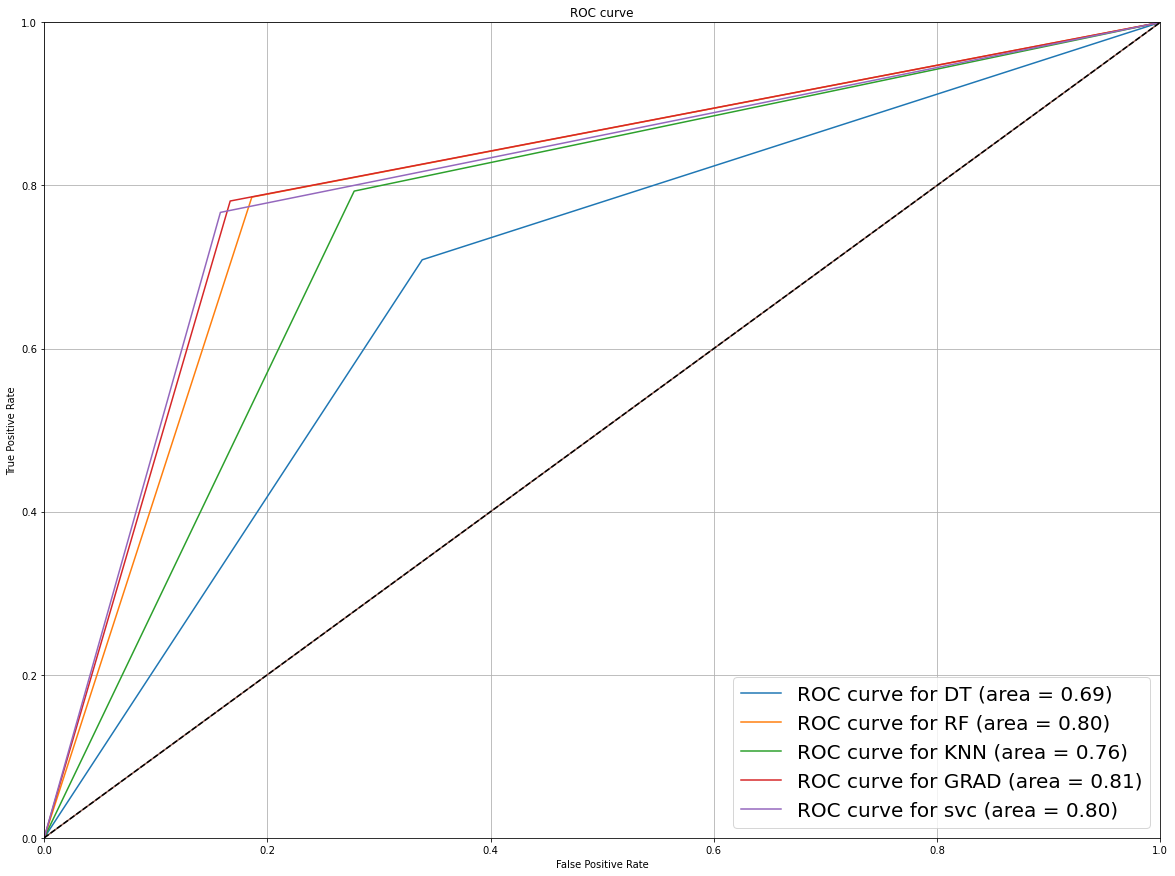

In [90]:
plt.figure(figsize = (20,15))

plt.plot(fpr1, tpr1, label = 'ROC curve for DT (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label = 'ROC curve for RF (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label = 'ROC curve for KNN (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label = 'ROC curve for GRAD (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, label = 'ROC curve for svc (area = %0.2f)' % roc_auc5)

plt.plot([0, 1], [0, 1], [0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc = 'lower right', fontsize = 20)
plt.grid(True)
plt.show()

#### inference


- random forest is the best model
    - least difference between cv_score and test accuracy
    - roc curve area is same for rf and grad, both models has highest area under roc_curve
    - error is same for rf and grad, least error compared to other models
    - F1 score is second highest for rf
    - Grad boosting take more time than random forest

#### Hyper paramter tuning

In [91]:
from sklearn.model_selection import GridSearchCV

In [101]:
par={'n_estimators': [300,400,500], 
     'max_features': ['log2', 'sqrt','auto'],
     'criterion': ['entropy', 'gini'],
     'max_depth': [200,300,400],
     'min_samples_split':[2, 3, 4]
}

In [102]:
grid=GridSearchCV( rf_c,par,cv=2)
grid.fit(x2_train,y2_train)
grid.best_params_  

{'criterion': 'entropy',
 'max_depth': 200,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 400}

In [103]:
rf=RandomForestClassifier( criterion= 'entropy', max_depth = 200, max_features= 'sqrt', min_samples_split= 3, n_estimators= 400)
rf.fit(x2_train,y2_train)
y_te=rf.predict(x2_test)
r2=round(accuracy_score(y2_test,y_te)*100,1)
print(r2)

80.9


In [104]:
cv_score=cross_val_score(rf,X,Y,cv=7)
cv_mean=round(cv_score.mean()*100,2)
print(cv_mean)

80.82


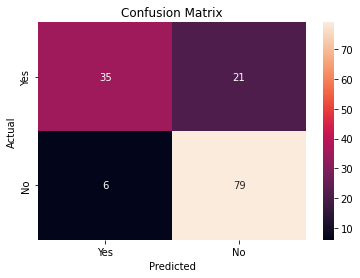

In [105]:
cm = confusion_matrix(y2_test, y_te)
class_label = ["Yes", "No"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print('\n')

- test accuracy and cv_score increased
- difference between test accuracy and cv_score decreased to 0.08
- the FN rate has also decreased, Fn here signifies that the loan shouldnt be approved but the model says loan can be approved which is not ideal for the company to do so

#### Storing model and loading it

In [108]:
import pickle
filename='loan_application_status.pkl'
pickle.dump(rf,open(filename,'wb'))

In [109]:
l_m=pickle.load(open('loan_application_status.pkl','rb'))
re=l_m.score(x2_test,y2_test)
print(re*100)

80.85106382978722
